In [1]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import pandas as pd
import re
import emoji

In [141]:
#read csv
df = pd.read_csv('raw_tweets.csv')
display(df)

,id,time,tweets,emoji
0,1589548998167142406,2022-11-07 09:23:08,@TheOluwabukunmi Mama the marketer 👏🤌🏾🙏,👏
1,1589548994581385217,2022-11-07 09:23:07,"@ecomwithbrook Great content! Very valuable, i...",👏
2,1589548988260573184,2022-11-07 09:23:05,@MagnaCartwheel @PetenShirl Good !!!!👏👏👏👏👏,👏
3,1589548987245219840,2022-11-07 09:23:05,He will follow 👏👏,👏
4,1589548966190153730,2022-11-07 09:23:00,@meriri Thank you Champ Calvin 👏,👏
...,...,...,...,...
87800,1589126820083163136,2022-11-06 05:25:33,https://t.co/Ic2c3WGBKv Bregman thinks he brok...,▶️
87801,1589123556117741569,2022-11-06 05:12:34,https://t.co/Ic2c3WGBKv 'Geaux Tigers': Number...,▶️
87802,1589122701142417409,2022-11-06 05:09:11,▶️ Deep Sort 95 - Matter Of Life 🙌🏾🔥\n@sbumphe...,▶️
87803,1589122261696798721,2022-11-06 05:07:26,46' | Confirmation of the two half time change...,▶️


Remove Duplicates

In [142]:
df.drop_duplicates(keep='first', subset="tweets",inplace=True)
df.info()
#df.loc[120].tweets
df=df.reset_index()

#data cleaning process
raw_dataset = df['tweets']
target_emoji = df['emoji']
tweet_id=df['id']
tweet_time=df['time']

#print(raw_dataset)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83581 entries, 0 to 87804
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      83581 non-null  int64 
 1   time    83581 non-null  object
 2   tweets  83581 non-null  object
 3   emoji   83581 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [143]:
display(df)

,index,id,time,tweets,emoji
0,0,1589548998167142406,2022-11-07 09:23:08,@TheOluwabukunmi Mama the marketer 👏🤌🏾🙏,👏
1,1,1589548994581385217,2022-11-07 09:23:07,"@ecomwithbrook Great content! Very valuable, i...",👏
2,2,1589548988260573184,2022-11-07 09:23:05,@MagnaCartwheel @PetenShirl Good !!!!👏👏👏👏👏,👏
3,3,1589548987245219840,2022-11-07 09:23:05,He will follow 👏👏,👏
4,4,1589548966190153730,2022-11-07 09:23:00,@meriri Thank you Champ Calvin 👏,👏
...,...,...,...,...,...
83576,87800,1589126820083163136,2022-11-06 05:25:33,https://t.co/Ic2c3WGBKv Bregman thinks he brok...,▶️
83577,87801,1589123556117741569,2022-11-06 05:12:34,https://t.co/Ic2c3WGBKv 'Geaux Tigers': Number...,▶️
83578,87802,1589122701142417409,2022-11-06 05:09:11,▶️ Deep Sort 95 - Matter Of Life 🙌🏾🔥\n@sbumphe...,▶️
83579,87803,1589122261696798721,2022-11-06 05:07:26,46' | Confirmation of the two half time change...,▶️


Remove hastags, urls, mentions, BOM character, none-English words and extra spaces after cleaning

In [144]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [145]:
#reference to https://github.com/giuliadnt/emo_tweepy with some changes
def clean_tweets(list_of_tweets):
    """
    :param list_of_tweets: list of unique tweets (no duplicates)
    :return: list of preprocessed tweets
    the function standardizes mentions --> @USER
    and URLs --> @URL
    removes BOM character
    """
    # matches @username
    mentions = re.compile('(@.*?)(?=\s|\:)')#(^|\s)
    # http://stackoverflow.com/questions/6038061/regular-expression-to-find-urls-within-a-string
    links = re.compile('(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    hashtags = re.compile('#([a-zA-Z0-9_]{1,50})')
    #no_mentions = [re.sub(mentions, "", i) for i in list_of_tweets]
    no_mentions = [re.sub(r"@\S+", "", i) for i in list_of_tweets]
    #no_links = [re.sub(links, "", i) for i in no_mentions]
    no_links = [re.sub(r"http\S+", "", i) for i in no_mentions]
    no_links = [re.sub(r"www.\S+", "", i) for i in no_links]
    no_BOM = [re.sub(u"\ufeff", "", i) for i in no_links]
    #no_hash = [re.sub(hashtags,"",i)for i in no_BOM]
    no_hash = [re.sub(r"#\S+","",i)for i in no_BOM]
    no_newlinechar = [re.sub('\n', "", i) for i in no_hash]
    #no_nonEnglish = [" ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha()) for sent in no_newlinechar]
    # for sent in no_newlinechar:
    #   sent = " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())
    no_extraspace = [" ".join(i.split()) for i in no_newlinechar]
    return no_extraspace

In [146]:
temp=["I need you girl 넌 아름다워I need you girl 너무 차가워I need you girl I need you girlI need you girl I need you girl - I NEED U -BTS Favorite K-Pop Artist","Happy Birthday @Tilly"]
clean_tweets(temp)
# sent = " ".join(w for w in nltk.wordpunct_tokenize(temp) if w.lower() in words or not w.isalpha())
# print(sent)

['I need you girl 넌 아름다워I need you girl 너무 차가워I need you girl I need you girlI need you girl I need you girl - I NEED U -BTS Favorite K-Pop Artist',
 'Happy Birthday']

In [147]:
#remove hashtags,urls,@,extraspances..
cleaned_dataset=clean_tweets(raw_dataset)
#display(cleaned_dataset)

In [148]:
#remove emoji from tweets
cleaned_tweets=[emoji.replace_emoji(i,replace="") for i in cleaned_dataset]

In [149]:
#display(cleaned_tweets)

In [150]:
#organize post and emoji to a dataframe
data2 = {'id':tweet_id,
         'time':tweet_time,
         'tweets':cleaned_tweets,
        'emoji':target_emoji}

Emojimotion_df = pd.DataFrame(data2)
display(Emojimotion_df)



,id,time,tweets,emoji
0,1589548998167142406,2022-11-07 09:23:08,Mama the marketer,👏
1,1589548994581385217,2022-11-07 09:23:07,"Great content! Very valuable, informative and ...",👏
2,1589548988260573184,2022-11-07 09:23:05,Good !!!!,👏
3,1589548987245219840,2022-11-07 09:23:05,He will follow,👏
4,1589548966190153730,2022-11-07 09:23:00,Thank you Champ Calvin,👏
...,...,...,...,...
83576,1589126820083163136,2022-11-06 05:25:33,Bregman thinks he broke finger: 'Can't really ...,▶️
83577,1589123556117741569,2022-11-06 05:12:34,'Geaux Tigers': Numbers behind LSU's big overt...,▶️
83578,1589122701142417409,2022-11-06 05:09:11,Deep Sort 95 - Matter Of Life my brother kod...,▶️
83579,1589122261696798721,2022-11-06 05:07:26,46' | Confirmation of the two half time change...,▶️


Drop the sentences that are less than 4 words

In [151]:
ind_list=[]
ind=0
temp=cleaned_tweets
for tw in temp:
  tw_word_list = re. findall(r"[\w'\"]+|[,.!?] ", tw)
  #print(len(tw_word))
  if len(tw_word_list)<4:
    ind_list.append(ind)
  ind=ind+1
Emojimotion_df.drop(ind_list,axis=0,inplace=True)

In [152]:
Emojimotion_df=Emojimotion_df.reset_index()
display(Emojimotion_df)

,index,id,time,tweets,emoji
0,1,1589548994581385217,2022-11-07 09:23:07,"Great content! Very valuable, informative and ...",👏
1,4,1589548966190153730,2022-11-07 09:23:00,Thank you Champ Calvin,👏
2,6,1589548927556411392,2022-11-07 09:22:51,"Congratulations, Dr. Damborsky! Awesome coinci...",👏
3,7,1589548923601010688,2022-11-07 09:22:50,Kindly help retweet my business tweet,👏
4,11,1589548899827449856,2022-11-07 09:22:44,"Here's to our goals this week, let's crush the...",👏
...,...,...,...,...,...
64378,83576,1589126820083163136,2022-11-06 05:25:33,Bregman thinks he broke finger: 'Can't really ...,▶️
64379,83577,1589123556117741569,2022-11-06 05:12:34,'Geaux Tigers': Numbers behind LSU's big overt...,▶️
64380,83578,1589122701142417409,2022-11-06 05:09:11,Deep Sort 95 - Matter Of Life my brother kod...,▶️
64381,83579,1589122261696798721,2022-11-06 05:07:26,46' | Confirmation of the two half time change...,▶️


In [153]:
#write the finnal dataframe to a csv file
Emojimotion_df.to_csv('/content/cleaned_tweets.csv',index=False)

In [154]:
#some dataset testing 
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
data = Emojimotion_df.groupby("emoji").size().sort_values(ascending = False)
data

emoji
➖     1393
👇     1347
🎧     1311
💩     1281
🔴     1272
▶️    1262
😓     1259
😡     1255
😬     1253
💓     1252
😠     1251
😕     1247
💀     1247
☁️    1230
😣     1226
📍     1219
😫     1215
😔     1211
😞     1196
😳     1191
😮     1176
😝     1165
😄     1164
❗️    1144
⚡️    1138
⬅️    1138
😹     1127
💃     1122
😌     1107
✔️    1103
✊     1099
😃     1084
🌷     1081
😋     1052
🌈     1048
✅     1046
👅     1045
🙏     1044
💙     1030
💖     1023
✨     1009
🍃     1008
💜     1001
💛      999
💗      981
💕      965
😚      958
💘      956
🌹      954
👏      943
💚      940
😘      936
🎁      926
👌      910
💋      852
🌺      834
😻      832
☕️     732
💰      322
👑      271
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 10134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127911 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128556 missing from current font.
  font

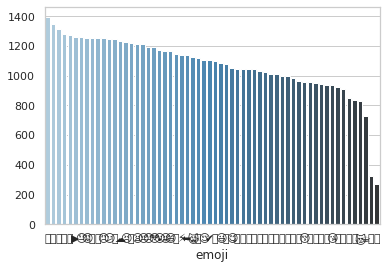

emoji
➖     1393
👇     1347
🎧     1311
💩     1281
🔴     1272
▶️    1262
😓     1259
😡     1255
😬     1253
💓     1252
😠     1251
😕     1247
💀     1247
☁️    1230
😣     1226
📍     1219
😫     1215
😔     1211
😞     1196
😳     1191
😮     1176
😝     1165
😄     1164
❗️    1144
⚡️    1138
⬅️    1138
😹     1127
💃     1122
😌     1107
✔️    1103
✊     1099
😃     1084
🌷     1081
😋     1052
🌈     1048
✅     1046
👅     1045
🙏     1044
💙     1030
💖     1023
✨     1009
🍃     1008
💜     1001
💛      999
💗      981
💕      965
😚      958
💘      956
🌹      954
👏      943
💚      940
😘      936
🎁      926
👌      910
💋      852
🌺      834
😻      832
☕️     732
💰      322
👑      271
dtype: int64

In [156]:
sns.set(style="whitegrid", color_codes=True)
data = Emojimotion_df.groupby("emoji").size().sort_values(ascending = False)
pal = sns.color_palette("Blues_d", len(data))
sns.barplot(x=data.index, y=data, palette=pal)

plt.show()

data